In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_random_seed(0)
from tensorflow import keras
import matplotlib.pyplot as plt

Import the excel dataset using Pandas. There are NaN values present. Let us perform a cleaning of the dataset to remove those.

In [2]:
data = pd.read_excel("anz.xlsx")
data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


Observe a count of missing values per each column. It can be observed that columns like bpay_biller_code and merchant_code has really high NULL values ( close to total rows in the dataset). It would be better to remove those columns rather than removing rows.

In [3]:
print(data.shape)
print(data.isnull().sum())

(12043, 23)
status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64


In [4]:
data.dropna(axis=1,inplace=True)
print(data.shape)
print(data.isnull().sum())

(12043, 16)
status             0
account            0
currency           0
long_lat           0
txn_description    0
first_name         0
balance            0
date               0
gender             0
age                0
extraction         0
amount             0
transaction_id     0
country            0
customer_id        0
movement           0
dtype: int64


Highlight the important columsn below. Columns like Account number, extraction date etc won't make a good feature for prediction, while age, status etc will make a good feature.

In [5]:
data

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,ACC-3021093232,AUD,149.83 -29.47,POS,Melissa,14054.14,2018-10-31,F,30,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,debit
12039,authorized,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,Robert,9137.79,2018-10-31,M,20,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,debit
12040,authorized,ACC-3827517394,AUD,151.12 -33.89,POS,Craig,45394.57,2018-10-31,M,28,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,debit
12041,authorized,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,Tyler,11350.67,2018-10-31,M,69,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,debit


For deriving the column salary (Annual Salary), let us assume the salary to be total_amount_withdrawn + last_balance. Let us extract the salary according to the above formula and insert as a new column in dataset.

In [6]:
custs = data['customer_id'].values
salary = []
for cust in custs:
    salary.append(sum(data['amount'][data['customer_id'] == cust].values) + data['balance'][data['customer_id'] == cust].values[-1])
salary 
data['customer_id'] = custs
data['salary'] = salary
    

There are Labelled values as well in the dataset. Convert these to numerical values using LabelEncoder().

In [7]:
data= data[['customer_id','status','txn_description','gender','age','movement','salary']]
data['status'] = LabelEncoder().fit_transform(data['status'].values)
data['txn_description'] = LabelEncoder().fit_transform(data['txn_description'].values)
data['gender'] = LabelEncoder().fit_transform(data['gender'].values)
data['movement'] = LabelEncoder().fit_transform(data['movement'].values)
data

,customer_id,status,txn_description,gender,age,movement,salary
0,CUS-2487424745,0,4,0,26,1,28346.45
1,CUS-2487424745,0,5,0,26,1,28346.45
2,CUS-2142601169,0,4,1,38,1,26017.51
3,CUS-1614226872,0,5,0,40,1,25319.46
4,CUS-2487424745,0,5,0,26,1,28346.45
...,...,...,...,...,...,...,...
12038,CUS-55310383,0,4,0,30,1,42421.30
12039,CUS-2688605418,0,5,1,20,1,29688.03
12040,CUS-2663907001,0,4,1,28,1,78854.13
12041,CUS-1388323263,0,5,1,69,1,30030.89


Generate a correlation matrix. This helps us visualize the correlation between variables and perform feature selection.

In [8]:
corr = abs(data.corr())
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,status,txn_description,gender,age,movement,salary
status,1.00,0.92,0.06,0.07,0.38,0.14
txn_description,0.92,1.00,0.04,0.07,0.43,0.13
gender,0.06,0.04,1.00,0.01,0.00,0.08
age,0.07,0.07,0.01,1.00,0.06,0.18
movement,0.38,0.43,0.00,0.06,1.00,0.00
salary,0.14,0.13,0.08,0.18,0.00,1.00


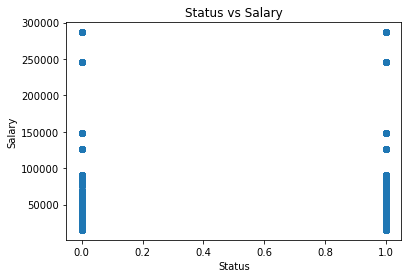

In [9]:
plt.scatter(data['status'],data['salary'])
plt.title("Status vs Salary")
plt.xlabel("Status")
plt.ylabel("Salary")
plt.show()

More distribution is present towards the salary range between 50k - 100k. As the range increases in salary, the distribution becomes less.

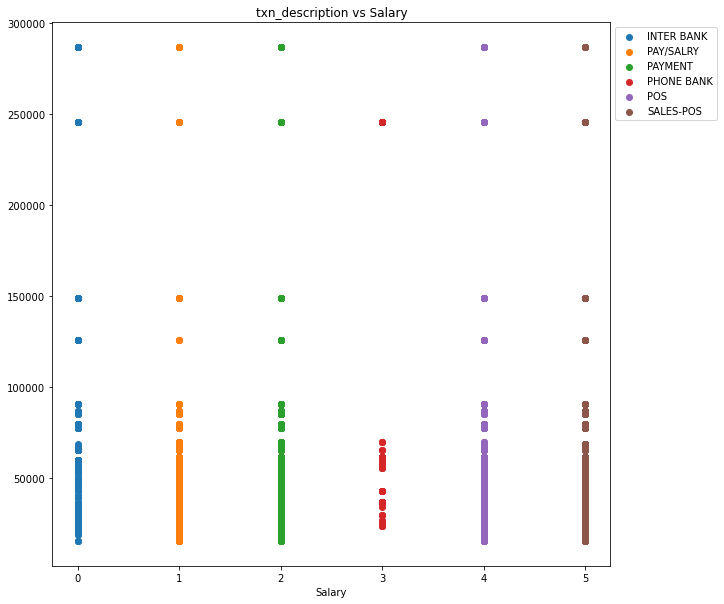

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(data['txn_description'][data['txn_description'] == 0],data['salary'][data['txn_description'] == 0],label="INTER BANK")
plt.scatter(data['txn_description'][data['txn_description'] == 1],data['salary'][data['txn_description'] == 1],label="PAY/SALRY")
plt.scatter(data['txn_description'][data['txn_description'] == 2],data['salary'][data['txn_description'] == 2],label="PAYMENT")
plt.scatter(data['txn_description'][data['txn_description'] == 3],data['salary'][data['txn_description'] == 3],label="PHONE BANK")
plt.scatter(data['txn_description'][data['txn_description'] == 4],data['salary'][data['txn_description'] == 4],label="POS")
plt.scatter(data['txn_description'][data['txn_description'] == 5],data['salary'][data['txn_description'] == 5],label="SALES-POS")
plt.legend(bbox_to_anchor=(1.0, 1.00))
plt.xlabel("txn_description")
plt.xlabel("Salary")
plt.title("txn_description vs Salary")
plt.show()

All transaction methods are thickly distributed between salary range of 50k - 100k. PHONE BANK is relatively less users.

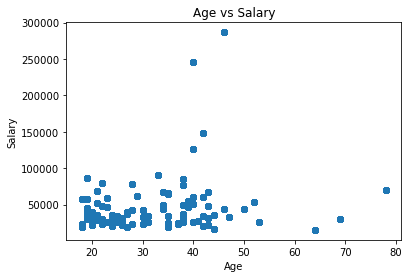

In [11]:
plt.scatter(data['age'],data['salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()

There is a high distribution of points till the age of 50 and these belong to the category of people whose annula salary is less than 50k. In the same graph, there are a few outliers as well. For the same age 40 and 50 there are a few customers who are having relatively high annual salary.

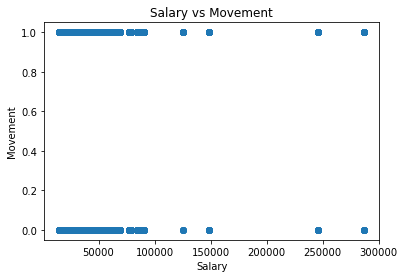

In [12]:
plt.scatter(data['salary'],data['movement'])
plt.xlabel("Salary")
plt.ylabel("Movement")
plt.title("Salary vs Movement")
plt.show()

The type of movement s somewhat equal in number and is more distributed between the salary range of 50k - 100k.

In [13]:
targets = data[['status','txn_description','age']].values
features = data['salary'].values
targets = targets.reshape(-1,3)
features = features.reshape(-1,1)
print(targets.shape)
print(features.shape)

(12043, 3)
(12043, 1)


In [14]:
train_features,test_features,train_labels,test_labels = train_test_split(targets,features,test_size=0.3,random_state=42)
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(8430, 3)
(8430, 1)
(3613, 3)
(3613, 1)


In [15]:
train_features = train_features.astype('float32')
test_features = test_features.astype('float32')

In [16]:
model = keras.Sequential()
model.add(keras.layers.Dense(3,activation='relu',input_shape = (3,)))
model.add(keras.layers.Dense(1))

model.compile(optimizer = keras.optimizers.Adam(0.09),loss='mae')
model.summary()
epochs=99
history = model.fit(train_features,
          train_labels,
          batch_size=8,
          epochs=epochs,
          validation_data=(test_features,test_labels))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
Train on 8430 samples, validate on 3613 samples
Epoch 1/99
8430/8430 [==============================] - 3s 298us/sample - loss: 22471.1476 - val_loss: 18227.8997
Epoch 2/99
8430/8430 [==============================] - 2s 197us/sample - loss: 18670.9799 - val_loss: 17958.4535
Epoch 3/99
8430/8430 [==============================] - 2s 195us/sample - loss: 18391.3918 - val_loss: 17677.5623
Epoch 4/99
843

8430/8430 [==============================] - 2s 188us/sample - loss: 17181.7791 - val_loss: 16740.8511
Epoch 64/99
8430/8430 [==============================] - 2s 185us/sample - loss: 17182.9460 - val_loss: 16739.0088
Epoch 65/99
8430/8430 [==============================] - 2s 184us/sample - loss: 17183.6992 - val_loss: 16741.8325
Epoch 66/99
8430/8430 [==============================] - 2s 183us/sample - loss: 17182.3851 - val_loss: 16735.7838
Epoch 67/99
8430/8430 [==============================] - 2s 188us/sample - loss: 17175.1026 - val_loss: 16740.6464
Epoch 68/99
8430/8430 [==============================] - 2s 190us/sample - loss: 17181.8803 - val_loss: 16771.4837
Epoch 69/99
8430/8430 [==============================] - 2s 185us/sample - loss: 17176.3167 - val_loss: 16765.4454
Epoch 70/99
8430/8430 [==============================] - 2s 196us/sample - loss: 17183.3878 - val_loss: 16731.7911
Epoch 71/99
8430/8430 [==============================] - 2s 193us/sample - loss: 17186.9593 

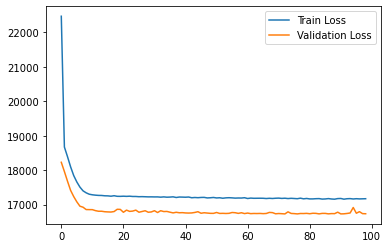

In [17]:
plt.plot(list(range(epochs)),history.history['loss'],label="Train Loss")
plt.plot(list(range(epochs)),history.history['val_loss'],label="Validation Loss")
plt.legend()
plt.plot()
plt.show()

The loss is around 16.7k which seems decent but still can be optimized more with a better dataset. Since majority of the customers are having salary between 50k - 100k this should provide a decent estimation of their salary.